# 1. Human Capital Accumulation :

# 2. AS-AD Model :

In [135]:
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt
sm.init_printing(use_unicode=True)

In [85]:
#Initialize the symbols
alpha = sm.symbols('alpha')
b = sm.symbols('b')
gamma = sm.symbols('gamma')
h = sm.symbols('h')
phi = sm.symbols('phi')
yt = sm.symbols('y_t')
pit = sm.symbols('pi_t')
pit_m1=sm.symbols('pi_t-1')
yt_m1 = sm.symbols('y_t-1')
vt = sm.symbols('v_t')
st = sm.symbols('s_t')
st_m1 = sm.symbols('s_t-1')
rt = sm.symbols('r_t')
it = sm.symbols('i_t')
exp_pit = sm.symbols('E[pi_t]')
exp_pit_p1 = sm.symbols('E[pi_t+1]')

**Question 1**

Now that we have the symbols let's write the SRAS curve with them :

In [86]:
#Write the SRAS base equation
SRAS_pit=pit_m1-phi*gamma*yt_m1+st-phi*st_m1+gamma*yt
SRAS_pit

We do the same with the AD curve :

In [87]:
#Write the AD base equation
AD_pit=(1/(h*alpha))*(vt-(1+b*alpha)*yt)
AD_pit

Now we will equalize SRAS and AD to find the equilibrium values. To do that we substract one to the other (which is the same as equilized):

In [88]:
#SRAS equation minus the AD equation
AS_minus_AD= SRAS_pit-AD_pit
AS_minus_AD

We solve this equation for $y_t$ :

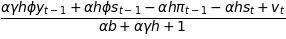

In [89]:
#Solve the equation for yt
eq_y = sm.solve(sm.Eq(AS_minus_AD,0),yt)
eq_y[0]

We get the equation of the equilibrium output $y_t$ which depend on $\alpha , \phi ,\gamma , h, b, \pi_{t-1} ,s_{t-1} ,y_{t-1} ,v_t$ and $s_t $.

Now that we have the equilibrium equation of the output, let's insert it in the SRAS curve :

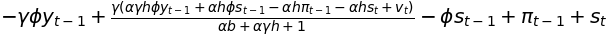

In [90]:
#Substitute the new output equation to replace yt
eq_pi= SRAS_pit.subs(yt,eq_y[0])
eq_pi

We obtain the equation of the equilibrium inflation which depend on $\gamma ,\phi , s_t ,\pi_{t-1} ,y_{t-1}$ and $s_{t-1}$

**Question 2**

We want to find the output and inflation for the equilibrium and see the evolution when there is a demand disturbance.
To do that we will create a dictonnary for the parameters of this question, and create two functions for the output and inflation from the equation find previously. We will use these functions to get the output and inflation level at the equilibrium and after a shock and plot the results.

First of all we create a dictionary to enter the value of our parameters ($\alpha$, $h$, $b$, $\phi$, $\gamma$) :

In [91]:
#initialization of the dicitonary
pms = {}

#enter the parameters and their value
pms['alpha']=5.76
pms['h'] = 0.5
pms['b'] = 0.5
pms['phi'] = 0
pms['gamma'] = 0.075

From the equation of the output find in the question one ( "eq_y" ), we create a function by using the lambdify.

In [92]:
#Our eq_y is a list, therefore we need to consider only the first element of it to use the lambdify function.
equil_output= sm.lambdify((vt, st, pit_m1, st_m1, yt_m1, alpha, h, b, phi, gamma),eq_y[0])

#define the function
def equili_output (vt, st, pit_m1, st_m1, yt_m1, alpha=pms['alpha'], h=pms['h'], b=pms['b'], phi=pms['phi'], gamma=pms['gamma']):
    """
    This function take five parameters plus five others which are by default define in the dictionary called "pms" and
    return the output of the economy.
    
        args :  vt (float) : the demand disturbance in period t
                st (float) : the supply disturbance in period t
                pit_m1 (float) : the inflation in period t-1
                st_m1 (float) : the supply disturbance in period t-1
                yt_m1 (float) : the output in period t-1
        
        return (float) : The output yt of the economy for the period t.
    
    """
    return equil_output (vt, st, pit_m1, st_m1, yt_m1, alpha, h, b, phi, gamma)

Now let's enter values of the variables at the equilibrium, which means $v_t = s_t = \pi_{t-1} = s_{t-1} = y_{t-1} = 0$ :

In [93]:
equili_output(0,0,0,0,0)

The output is zero ($y_t = 0$) which makes sense given that all the other variables are equal to 0.

Now let's what would be the impact of a positive demand disturbance on the production. For that let's just set $v_t = 0.1$ instead of 0 :

In [94]:
equili_output(0.1,0,0,0,0)

When there is a positive disturbance of the demand $v_t$ we can observe an increase in the output. Indeed an increase in demande will stimulate the economy, the supply will adapt to the demand, increase as well, leading to more production.

Now let's see the impact of the demand disturbance on the **inflation** :

As before we use the inflation equation find in question one ( "eq_pi" ) to create a function.

In [98]:
#use lambdify on the inflation equation eq_pi
equil_pi= sm.lambdify((st, yt, pit_m1, st_m1, yt_m1, gamma, phi),SRAS_pit)

#define the function
def equili_pi (st, yt, pit_m1, st_m1, yt_m1, gamma=pms['gamma'], phi=pms['phi']):
    """
    This function take five parameters plus two others which are by default define in the dictionary called "pms" and
    return the inflation of the economy.
    
        args :  st (float) : the supply disturbance in period t
                yt (float) : the output in period t
                pit_m1 (float) : the inflation in period t-1
                st_m1 (float) : the supply disturbance in period t-1
                yt_m1 (float) : the output in period t-1
        
        return (float) : The inflation pit of the economy for period t.
    
    """
    return equil_pi (st, yt, pit_m1, st_m1, yt_m1, gamma, phi)

In [99]:
equili_pi(0,0,0,0,0)

At the equilibrium, when $v_t = s_t = \pi_{t-1} = s_{t-1} = y_{t-1} = 0$ the inflation is zero ($\pi_t = 0$). 
Regarding the demand disturbance, it is not involve in the inflation equation, however its impact increased the output in period t. This increase in output will impact the inflation : 

In [100]:
equili_pi(0,0.0244140625,0,0,0)

The positive disturbance on the demand also increase the inflation.
We can summarize the effect of this disturbance as follow:
   1. The positive choc on $v_t$ leads to a higher demand
   2. The supply and the demand adjust on a higher production and therefor a higher output $y_t$
   3. Finally a higher output lead to inflation, an increase in $\pi_t$

**Question 3**

In this question we introduce a demand and a supply shock inside the demand and supply disturbance. Now these both variables became function of shocks and some parameters. 

In theses conditions we want to know how the economy will evolve, starting from the equilibrium, if there is a demand shock in the first period. To answer this question we will first adapt our model to the new definitions of $v_t$ and $s_t$.

Now the have two new parameters ($\delta$, $\omega$) and $v_t$ and $s_t$ which became function. We have to set up this new configuration:

In [101]:
#add the new parameters into the dictionary
pms["delta"] = 0.80
pms["omega"] = 0.15

#define the new symbols
delta = sm.symbols("delta")
omega = sm.symbols("omega")
vt_m1 = sm.symbols("v_t-1")
xt = sm.symbols("x_t")
ct = sm.symbols("c_t")

#define the new vt and st equation
vt_ar = delta*vt_m1 + xt
st_ar = omega*st_m1 + ct

To deal with these changes, we have to replace our $v_t$ in the output equation by the new one which is vt_ar :

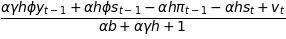

In [102]:
#The output equilibrium equation (our previous equation):
eq_y[0]

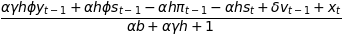

In [103]:
#substitute vt by vt_ar
eq_y_ar = eq_y[0].subs(vt,vt_ar)
eq_y_ar

We have to do the same in the SRAS equation, by replacing $s_t$ by st_ar:

In [119]:
#The SRAS equation (our previous equation):
SRAS_pit

In [110]:
#substitute st by st_ar
eq_pi_ar = SRAS_pit.subs(st,st_ar)
eq_pi_ar

Now that we changed our equation, we also have to make these changes inside our previous functions :

In [120]:
#create a new output function, with the new parameters
equil_output2= sm.lambdify((st, vt_m1, pit_m1, st_m1, yt_m1, ct, xt, alpha, h, b, phi, gamma, delta),eq_y_ar)
def equili_output_ar (st, vt_m1, pit_m1, st_m1, yt_m1, ct, xt, alpha=pms['alpha'], h=pms['h'], b=pms['b'], phi=pms['phi'], gamma=pms['gamma'], delta=pms['delta']):
    return equil_output2 (st, vt_m1, pit_m1, st_m1, yt_m1, ct, xt, alpha, h, b, phi, gamma, delta)

In [121]:
equili_output_ar(0,0.1,0,0,0,0,0)

In [122]:
#create a new inflation function, with the new parameters
equil_piii= sm.lambdify((yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi),eq_pi_ar)
def equili_pi_ar (yt_m1, yt, pit_m1, st_m1, ct, omega=pms['omega'], gamma=pms['gamma'], phi=pms['phi']):
    return equil_piii (yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi)

In [123]:
#test at the initial state
equili_pi_ar(0,0,0,0,0)

Now let's enter the new output value to get the new inflation value:

In [124]:
equili_pi_ar(0,equili_output_ar(0,0.1,0,0,0,0,0), 0, 0, 0)

In [132]:
#define the number of time period
T = 100

#create a loop to see the evolution of output and inflation

shock = 0.1
pi_m = 0
yn = 0

list_output = list(range(100))
list_inflation = list(range(100))

for i in range(T):
    
    if i = 1 :
        y = equili_output_ar(0,0,pi_m,0,yn,0,0)
        list_output[i] = y
        p = equili_pi_ar(0,y,pi_m,0,0)
        list_inflation[i] = p
    else : 
        y = equili_output_ar(0,shock,pi_m,0,yn,0,0)
        list_output[i] = y
        p = equili_pi_ar(0,y,pi_m,0,0)
        list_inflation[i] = p  
        pi_m = p
        yn = y

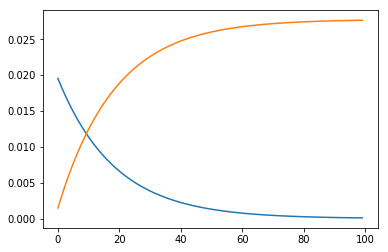

In [137]:
plt.plot(list_output)
plt.plot(list_inflation)

# 3. Exchange Economy